In [134]:
import pandas as pd
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
from tqdm import tqdm
from collections import defaultdict
import itertools

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 11 月 30 日到 2024 年 5 月 31 日，共包含 15,189 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 15189 筆，無空值。
2. `artComment`: 文章評論，總共 15189 筆，無空值。
3. `artDate`: 文章日期，總共 15189 筆，無空值。
4. `insertedDate`: 插入日期，總共 15189 筆，無空值。
5. `artContent`: 文章內容，總共 15186 筆，有 3 筆空值。
6. `artCatagory`: 文章類別，總共 15189 筆，無空值。
7. `dataSource`: 資料來源，總共 15189 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 15189 筆，無空值。
9. `artTitle`: 文章標題，總共 15189 筆，無空值。
10. `artUrl`: 文章網址，總共 15189 筆，無空值。

## 記憶體使用情況

- 資料集大小：1.3 MB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [135]:
df = pd.read_csv('data/ptt_ai_221130to240531.csv')
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,ggglu,Finance,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,2022-02-16 00:12:45,ptt
1,2,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,make1302,Finance,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,2022-05-22 01:11:41,ptt
2,3,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,kria5304,Finance,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,2023-02-15 01:06:37,ptt
3,4,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,BangBang5566,Finance,證交所徵才開創數位驅動時代 報名至11/17止\n\n中央社\n2023年10月30日 週一...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,2023-10-31 01:10:55,ptt
4,5,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,howdigh,job,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,[],125.230.247.67,2022-01-04 00:58:48,ptt


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2172 non-null   int64 
 1   artUrl        2172 non-null   object
 2   artTitle      2172 non-null   object
 3   artDate       2172 non-null   object
 4   artPoster     2172 non-null   object
 5   artCatagory   2172 non-null   object
 6   artContent    2172 non-null   object
 7   artComment    2172 non-null   object
 8   e_ip          2126 non-null   object
 9   insertedDate  2172 non-null   object
 10  dataSource    2172 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.8+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [137]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [138]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,e_ip,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,【實習】，【公司名稱】Influx FinTech 普匯金融科技。【工作職缺】Fintech...
1,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長...,118.171.234.47,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威，，董事長呂...
2,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,36.224.200.45,週二 上午6:32，擁抱「金」飯碗的機會來了。中央銀行近日公開徵才，開出的職缺包括「經濟金...
3,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,證交所徵才開創數位驅動時代 報名至11/17止\n\n中央社\n2023年10月30日 週一...,42.70.143.5,證交所徵才開創數位驅動時代 報名至11/17止。中央社，2023年10月30日 週一 下午1...
4,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,125.230.247.67,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
5,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-05 15:59:05,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,1.160.17.133,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
6,[北部]林口長庚醫院醫療AI中心誠徵統計分析助理,2022-01-13 14:05:16,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,61.220.52.4,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
7,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-17 09:28:27,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,1.162.212.73,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
8,[台北]三軍總醫院AIoT中心誠徵博士級研究員,2022-01-20 16:52:39,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,219.87.87.33,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
9,"[台北]4w+薪商標專利業務行銷撰稿,專利師",2022-01-21 18:30:13,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,223.137.115.117,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Setup Jieba 斷詞設定</div>

In [139]:
# 初始化斷詞引擎
jieba.set_dictionary('dict/dict.txt') 

# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict('dict/user_dict.txt')

# 參數形式手動將字詞加入斷詞字典
words = ["行動或市內電話"]
for w in words:
    jieba.add_word(w, freq=None, tag=None)

Building prefix dict from D:\GitHub\SocialMediaAnalysisAboutAITrend\dict\dict.txt ...
Loading model from cache C:\Users\eddie\AppData\Local\Temp\jieba.ub597ddb100a85c4b52bbc06e3b7935c2.cache
Loading model cost 0.436 seconds.
Prefix dict has been built successfully.


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Setup Stopwords 設定停用字</div>

In [140]:
# 對於這段文字所定義的停用字列表
with open(f'./dict/text_stopwords.txt', 'r', encoding="utf8") as f:
    stopwords = f.read().splitlines()  #移除換行符號\n

# 參數形式手動加入停用字
user_stop = [
    "的", "來", "對於", "愈來愈", "就是", "什麼",
    "空白", "00", "同義文字", "email", "站各級", "延長工時",
    "電子郵件", "市內電話", "條款", "限制", "應注意", "條文", "註明", "保",
    "詳盡", "資訊", "規範", "本條", "網站", "項", "留", "單位", "名稱", "法律",
    "條例", "使用者", "特殊", "條件", "時間", "內容", "其餘項目", "但不得", "本",
    "為每小時", "單位者", "為每小時", "依", "行", "相關", "第一項", "其他",
    "protected", "未註明", "現行法律", "其餘項留", "情況",
    "目前", "包含", "進行", "指出", "可以", "認為", "包括",
    "同時", "問題", "影響", "因此", "以及", "發展", "the", "and", '表示', '我們', '可能', '原文標題', '原文連結',
    '原文內容',
    '心得評論', '工作', '使用', '現在', '已經', '因為', '自己', '透過', '他們', '提供', '開始', '不過', '需要',
    '記者署名', '去年', '成為', '針對', '如果', '甚至', '推出', '出現', '部分', '領域', '開發', '政府', '所以', '方式',
    '希望', '還是', '能力', '由於', '除了', '請具體', '方面', '獲得', '主要', '過去', '提升', '該公司', '資料', '此外',
    '報導', '生產', '能夠', '例如', '詳述狀況', '強調', '解決方案', '是否', '非常', '以上', '研究', '無法', '成功',
    '結果', '完成', '不同', '這樣', '如何', '機會', '安全', '數據', '處理', '研發', '宣布', '模型', '記者', '重要',
    '國家', '預估', '直接', '設備', '業者', '網路', '擁有', '之一', '另外', '利用', '必須', '支持', '成本', '應用',
    '一個', '人工智慧', 'AI', '公司', '市場', '億美元', '美元', 'rs', '這些', '表現', 'of', '持續', '雖然', '億元',
    '根據', '團隊', '隨著', '客戶', '其中', 'to', '這個', '未來', '平台', '產業', '產品', '今年', '今天', '預計', '預期']

for i in user_stop:
    stopwords.append(i)

pd.DataFrame(stopwords, columns=['停用詞'])

,停用詞
0,，
1,「
2,」
3,、
4,。
...,...
188,產品
189,今年
190,今天
191,預計


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Sentence 斷句</div>

In [141]:
# 利用標點符號將句子斷開
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

# 將斷詞後的句子存入新的 DataFrame
sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head(10)

,artTitle,artDate,artContent,e_ip,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,【實習】
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,【公司名稱】Influx FinTech 普匯金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,【工作職缺】Fintech Marketing Intern/ Fiance Intern
3,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,【徵求條件】
4,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,1.商管相關科系或曾經接觸相關Fintech領域
5,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,2.關注時事議題
6,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,對國內外金融科技趨勢議題有興趣
7,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,3.熟悉 Office 軟體、社群軟體
8,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,具圖文影音創作能力者額外加分
9,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,4.具 Adobe illustrator / Adobe Photoshop / Adob...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Word 斷詞</div>

In [142]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head(10)

,artTitle,artDate,artContent,e_ip,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,公司名稱Influx FinTech 普匯金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,工作職缺Fintech Marketing Intern Fiance Intern
3,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,徵求條件
4,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,1商管相關科系或曾經接觸相關Fintech領域
5,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,2關注時事議題
6,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,對國內外金融科技趨勢議題有興趣
7,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,3熟悉 Office 軟體社群軟體
8,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,具圖文影音創作能力者額外加分
9,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,4具 Adobe illustrator Adobe Photoshop Adobe P...


In [143]:
# 設定進度條
tqdm.pandas()

# 將句子進行斷詞
word_df = sent_df.assign(word = sent_df['sentence'].progress_apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

# 去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

100%|██████████| 148480/148480 [00:07<00:00, 19220.70it/s]


,artTitle,artDate,artContent,e_ip,word
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,公司
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,名稱
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,Influx
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,FinTech
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,普匯
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,金融
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,工作
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,職缺


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Deal with High Frequency Words 處理高頻詞</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Find High Frequency Words 找出高頻詞</div>

In [144]:
# 合併高頻詞組
def get_word_pairs(words):
    pairs = defaultdict(int)
    for sentence in words:
        for word1, word2 in itertools.combinations(sentence, 2):
            pairs[(word1, word2)] += 1
    return pairs

In [145]:
sentences = sent_df['sentence'].progress_apply(jieba.lcut)
word_pairs = get_word_pairs(sentences)
sorted_word_pairs = sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)

100%|██████████| 148480/148480 [00:08<00:00, 18394.43it/s]


In [146]:
sorted_word_pairs[:10]

[((' ', ' '), 146834),
 ((' ', '的'), 9408),
 (('的', ' '), 4615),
 (('的', '的'), 3923),
 (('是', '的'), 3384),
 ((' ', 'the'), 3278),
 (('在', '的'), 3255),
 ((' ', 'AI'), 3192),
 (('the', ' '), 2721),
 (('AI', ' '), 2641)]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Compute High Frequency Words 計算高頻詞</div>

In [147]:
high_freq_pairs = [(pair[0][0] + pair[0][1], pair[1]) for pair in sorted_word_pairs if pair[1] > 10]
high_freq_pairs[:10]

[('  ', 146834),
 (' 的', 9408),
 ('的 ', 4615),
 ('的的', 3923),
 ('是的', 3384),
 (' the', 3278),
 ('在的', 3255),
 (' AI', 3192),
 ('the ', 2721),
 ('AI ', 2641)]

In [148]:
high_freq_pairs

[('  ', 146834),
 (' 的', 9408),
 ('的 ', 4615),
 ('的的', 3923),
 ('是的', 3384),
 (' the', 3278),
 ('在的', 3255),
 (' AI', 3192),
 ('the ', 2721),
 ('AI ', 2641),
 ('AI的', 2435),
 ('和的', 2007),
 (' of', 2002),
 (' to', 1947),
 ('and ', 1930),
 (' and', 1846),
 ('在 ', 1818),
 ('of ', 1750),
 (' 和', 1706),
 ('to ', 1639),
 ('的是', 1621),
 ('有的', 1590),
 ('的和', 1503),
 (' 在', 1467),
 (' 是', 1464),
 ('了的', 1453),
 (' 年', 1444),
 (' 月', 1314),
 ('與的', 1292),
 (' in', 1292),
 ('對的', 1291),
 (' 與', 1267),
 ('和 ', 1238),
 (' 了', 1220),
 ('年 ', 1213),
 ('的AI', 1188),
 (' a', 1181),
 (' 有', 1171),
 ('in ', 1171),
 ('our ', 1167),
 ('是 ', 1156),
 (' 滿', 1143),
 (' 必需', 1141),
 (' 30', 1137),
 ('2 ', 1135),
 (' 字', 1133),
 (' 填寫', 1132),
 ('也的', 1125),
 (' 億美元', 1118),
 ('我們的', 1115),
 ('其他', 1110),
 ('心得 ', 1099),
 ('公司的', 1096),
 ('評論 ', 1077),
 ('a ', 1038),
 (' our', 1036),
 (' on', 1020),
 ('原文標題', 997),
 (' 等', 996),
 ('1 ', 984),
 ('on ', 975),
 ('原文連結', 970),
 ('年的', 937),
 ('3 ', 900),
 ('在中', 

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Update dictionary 更新字典</div>

In [149]:
# 更新斷詞字典
for word, freq in high_freq_pairs:
    jieba.add_word(word, freq=freq)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Word with Updated Dictionary 重新斷詞</div>

In [150]:
# 重新斷詞
word_df = sent_df.assign(word=sent_df['sentence'].progress_apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)
word_df = word_df.loc[word_df['word'].str.len() > 1]

100%|██████████| 148480/148480 [00:07<00:00, 18909.83it/s]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Remove Stopwords 移除停用字</div>

In [151]:
no_stop_df = word_df[~word_df['word'].isin(stopwords)]
no_stop_df.head(10)

,artTitle,artDate,artContent,e_ip,word
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,公司名稱
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,Influx
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,FinTech
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,普匯
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,工作職缺
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,Fintech
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,Marketing
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,118.168.142.101,Intern


In [152]:
# 去除是數字
no_stop_df = no_stop_df[~no_stop_df['word'].str.isnumeric()]

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Keyword Analysis 關鍵字分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency Analysis 關鍵字頻率分析</div>

In [153]:
# 計算詞頻
freq_df = pd.DataFrame(pd.value_counts(no_stop_df['word'])).sort_values(by=['count'], ascending=False).reset_index()

# 將詞頻資料集存入新的 DataFrame
freq_df.head(10)

,word,count
0,台灣,1599
1,美國,1199
2,中國,1096
3,台積電,873
4,技術,738
5,全球,672
6,投資,670
7,晶片,622
8,企業,600
9,合作,574


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency Visualization 關鍵字頻率視覺化</div>

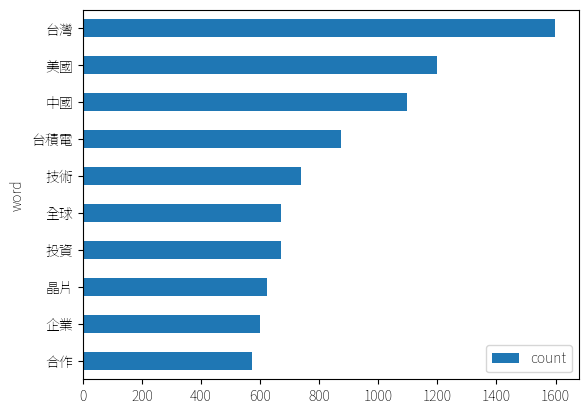

In [154]:
freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency WordCloud 關鍵字頻率文字雲</div>

In [155]:
# wordcloud 的輸入須為 dict，因此先將 freq_df 轉換成成 dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'台灣': 1599,
 '美國': 1199,
 '中國': 1096,
 '台積電': 873,
 '技術': 738,
 '全球': 672,
 '投資': 670,
 '晶片': 622,
 '企業': 600,
 '合作': 574,
 '需求': 559,
 '成長': 554,
 '黃仁勳': 530,
 '增加': 524,
 '系統': 521,
 '輝達': 511,
 '科技': 508,
 '服務': 504,
 '計畫': 503,
 '生成式': 501,
 'Google': 477,
 '2023年': 459,
 '員工': 457,
 '台股': 449,
 'OpenAI': 439,
 '股價': 436,
 '2022年': 436,
 'GPU': 435,
 '設計': 429,
 'ChatGPT': 428,
 '超過': 418,
 '蘋果': 410,
 '微軟': 402,
 '國際': 396,
 '2024年': 393,
 '英特爾': 384,
 '半導體': 383,
 '大學': 375,
 '目標': 373,
 'AMD': 369,
 '分析': 362,
 '應該': 361,
 '經濟': 349,
 '營收': 340,
 '業務': 339,
 '智慧': 321,
 '推動': 311,
 '人工智慧AI': 311,
 '伺服器': 307,
 '鴻海': 306,
 '中心': 304,
 '執行': 300,
 '投入': 300,
 '活動': 299,
 '三星': 298,
 '廠商': 297,
 '看到': 296,
 '日本': 295,
 '長期': 295,
 'Meta': 294,
 '明年': 293,
 '價格': 292,
 '世界': 292,
 'on': 291,
 '交易': 290,
 '之後': 290,
 '進入': 289,
 'NVIDIA': 288,
 '比較': 288,
 '經驗': 288,
 '最新': 287,
 '最近': 287,
 '協助': 286,
 '挑戰': 286,
 'AI的': 284,
 '這是': 284,
 '訓練': 282,
 '指數': 282,
 '提高': 281,
 '功能': 2

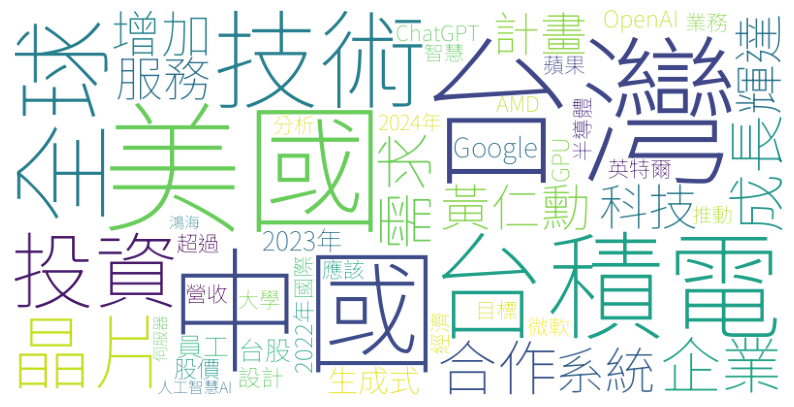

In [156]:
# 繪製文字雲
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

根據這個文字雲，我們可以觀察到以下幾點：

1. 主要國家和地區：
   - 美國和中國是出現頻率最高的詞，顯示了這兩個國家在AI討論中的重要性。
   - 台灣也有較高的出現頻率，可能是因為該討論集中在台灣的社群媒體上。

2. 主要技術和產業：
   - 技術、產業和服務這些詞彙頻繁出現，表明討論中關注了技術應用及其對產業的影響。
   - 晶片、GPU和AI晶片等詞彙的高頻出現，顯示了硬體技術在AI討論中的重要地位。

3. 時間和趨勢：
   - 2023年、2024年、2022年等年份的出現頻率較高，說明討論中涉及了過去、當前和未來的趨勢與預測。

4. 重要公司和產品：
   - Google、OpenAI、輝達（NVIDIA）等公司名詞頻繁出現，顯示了這些公司在AI領域的影響力。
   - ChatGPT和GPU等技術產品的出現頻率也較高，表明這些技術在討論中被廣泛提及。

5. 增長和發展：
   - 成長、增長、預期等詞彙的出現頻率高，顯示了討論中對AI技術和市場發展前景的關注。